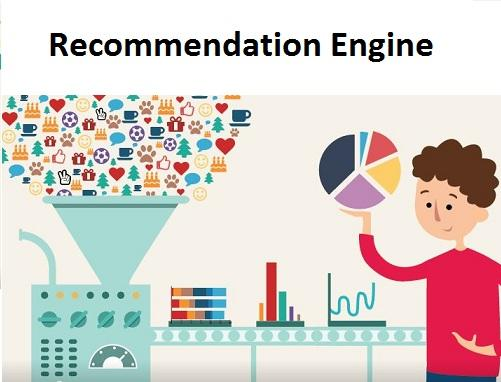

#  <div align="center">Recommendation platform based on the description of the company

### *Objective*
------
In this project, We understand and build a recommendation platform step by step which will suggest similar companies based on the description of the company.

1. **What are recommendation engines?**<br />
   A recommendation engine filters the data using different algorithms and        recommends the most relevant end product to users.
 
 
2. There are many type of recommendation engines but in this documentation we will talk about **Content-based filtering**. In this algorithms we give user preferences for items and recommend similar items based on a domain-specific notion of item content.

---
## Content based filtering
---
#### Note:- This is our basic approach but we will make changes in our basic approach to dig deep in NLP
---
**A content-based recommender works with data that the user provides, either explicitly (rating or description) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on those recommendations, the engine becomes more and more accurate.**

For example, if a person has liked the company “A”, then this algorithm will recommend companies that fall under the same sector. But how does the algorithm understand which sector to pick and recommend company from?<br />

**What are the concepts used in Content Based Recommenders?**<br />
The concepts of **Word Embeddings** are used in information retrieval systems.
In very simplistic terms, Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text. 

There are many options in Word Embeddings like BOW(Bag of word), TF-IDF and word2vec and in this documentaion we use Word2Vec approach because of it's low chance of overfitting.

**Word2Vec** is a method to construct such an embedding. It can be obtained using two methods (both involving Neural Networks): Skip Gram and Common Bag Of Words (CBOW)

*After calculating word2vec scores, how do we determine which items are closer to each other, rather closer to the user profile? This is accomplished using the Vector Space Model or classification models like Random Forest, SVM , Decision Tress etc.  which computes the proximity based on different methods.*

**So according to our problem we have a dataset having company website hyperlink and description about that company and we have to find similarity between those companies based on there description**

In [ ]:
#Lets do some snippet of code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('File_Location', sep=',' , names=["Company_Website", "Company_Description"], skiprows= 0, nrows=5000)
# In order to lessen the computing pressure, I will just experiment on the first 5 thousand records only.

In the above mentioned code we read 5000 rows in a csv file with column names "Company_Website" and "Company_Description".

## Text Preprocessing

In [ ]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Company_Description'][i]) #this will replace everything except a-z and A-Z with space.
    review = re.sub(r'\d',' ',review)  #this will replace counting or date with space
    review = re.sub(r'\s+',' ',review)  #this will replace special characters with space
    review = review.lower()
    review = review.split()     #split will divide paragraph into words(fit for lemmatization)
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)  # This will join every lemmatized word and make a paragraph again.
    corpus.append(review)

print(corpus)

In the above mentioned code we use Lemmatizer instead of stemming for better accuracy and convert each text in lower.<br/>
**"a-zA-Z"** this command will replace everything with space except alphabets "a-zA-Z". (^ = not sign).<br/>

We will get a pure text output after applying above processes.

**As we know we have to use similarity in words mentioned in description of a company. So, we have to convert words in vectors.**<br/>

We will use **Word Embedding** techniques to get a vector.

---
## Feature Extraction

In [ ]:
#Method 1:- TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3))
tfidf_vectorizer.fit(corpus)

feature_vectors = tfidf_vectorizer.transform(corpus)

---
## Word2vec
It basically place the word in the feature space is such a way that their location is determined by their meaning i.e. words having similar meaning are clustered together and the distance between two words also have the same meaning.
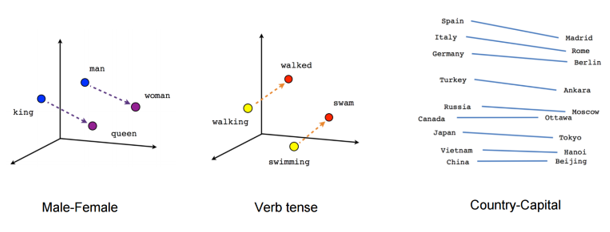

word2vec uses cosine similarity for finding out the most similar word. Cosine similarity is not only telling the similarity between two vectors but it also test for orthogonality of vector. Cosine similarity is represented by formula:
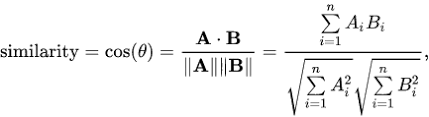

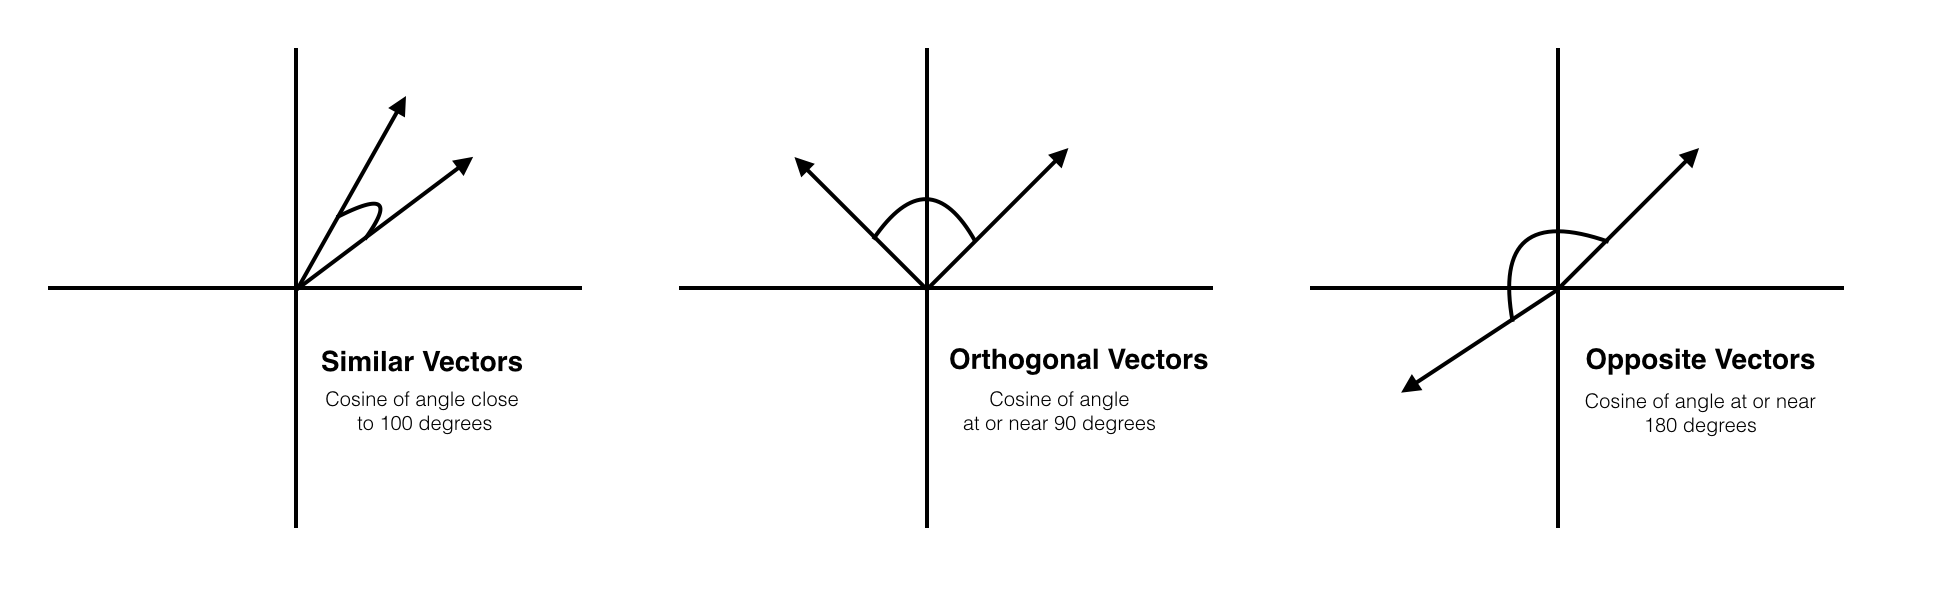

If angle are close to zero than we can say that vectors are very similar to each other and if theta is 90 than we can say vectors are orthogonal to each other (orthogonal vector not related to each other ) and if theta is 180 we can say that both the vector are opposite to each other.

In [ ]:
#Method 2:- Word2Vec

#!pip install gensim
from gensim.models import Word2Vec
import numpy as np

For representing sentence as a vector we will take mean of all the word embeddings which are present in the vocabulary of Word2Vec but in our case unlike taking the mean of word embeddings, we will take a weighted average of word embeddings.
Every word embedding is weighted by a/(a + p(w)), where a is a parameter that is typically set to 0.001 and p(w) is the estimated frequency of the word in a corpus.

In [ ]:
#Training word2vec model
i=0
list_of_sentance=[]
for sentance in corpus:
    list_of_sentance.append(sentance.split())

In [ ]:
model=Word2Vec(list_of_sentance,
        size=150,
        window=10,
        min_count=1,
        workers=10,
        iter=10)
words = model.wv.vocab

## Test on given data

In [1]:
Test_data=["Gitlab.com ; From project planning and source code management to CI/CD and monitoring, GitLab is a complete DevOps platform, delivered as a single application. Only GitLab enables Concurrent DevOps to make the software lifecycle 200% faster.",

"Cloudbees.com ; Reduce risk, optimize software delivery and accelerate innovation with CloudBees - the industry-leading DevOps technology platform. Build Stuff That Matters.",

"squarespace.com ; Squarespace is the all-in-one solution for anyone looking to create a beautiful website. Domains, eCommerce, hosting, galleries, analytics, and 24/7 support all included.",

"Wix.com ; Create a free website with Wix.com. Choose a stunning template and customize anything with the Wix website builder—no coding skills needed. Create yours today!"
    ]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
mat = [n.split(';') for n in Test_data]
#print(mat)
df = pd.DataFrame(mat,columns=["Company_Website", "Company_Description"])
#df.columns = df.iloc[0]
#df = df.reindex(newdf1.index.drop(0))
print(df)

    Company_Website                                Company_Description
0       Gitlab.com    From project planning and source code managem...
1    Cloudbees.com    Reduce risk, optimize software delivery and a...
2  squarespace.com    Squarespace is the all-in-one solution for an...
3          Wix.com    Create a free website with Wix.com. Choose a ...


In [4]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Company_Description'][i]) #this will replace everything except a-z and A-Z with space.
    review = re.sub(r'\d',' ',review)  #this will replace counting or date with space
    review = re.sub(r'\s+',' ',review)  #this will replace special characters with space
    review = review.lower()
    review = review.split()     #split will divide paragraph into words(fit for lemmatization)
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)  # This will join every lemmatized word and make a paragraph again.
    corpus.append(review)

print(corpus)

['project planning source code management ci cd monitoring gitlab complete devops platform delivered single application gitlab enables concurrent devops make software lifecycle faster', 'reduce risk optimize software delivery accelerate innovation cloudbees industry leading devops technology platform build stuff matter', 'squarespace one solution anyone looking create beautiful website domain ecommerce hosting gallery analytics support included', 'create free website wix com choose stunning template customize anything wix website builder coding skill needed create today']


In [5]:
#Training word2vec model
i=0
list_of_sentance=[]
for sentance in corpus:
    list_of_sentance.append(sentance.split())
list_of_sentance

[['project',
  'planning',
  'source',
  'code',
  'management',
  'ci',
  'cd',
  'monitoring',
  'gitlab',
  'complete',
  'devops',
  'platform',
  'delivered',
  'single',
  'application',
  'gitlab',
  'enables',
  'concurrent',
  'devops',
  'make',
  'software',
  'lifecycle',
  'faster'],
 ['reduce',
  'risk',
  'optimize',
  'software',
  'delivery',
  'accelerate',
  'innovation',
  'cloudbees',
  'industry',
  'leading',
  'devops',
  'technology',
  'platform',
  'build',
  'stuff',
  'matter'],
 ['squarespace',
  'one',
  'solution',
  'anyone',
  'looking',
  'create',
  'beautiful',
  'website',
  'domain',
  'ecommerce',
  'hosting',
  'gallery',
  'analytics',
  'support',
  'included'],
 ['create',
  'free',
  'website',
  'wix',
  'com',
  'choose',
  'stunning',
  'template',
  'customize',
  'anything',
  'wix',
  'website',
  'builder',
  'coding',
  'skill',
  'needed',
  'create',
  'today']]

In [17]:
from gensim.models import Word2Vec
import numpy as np
model=Word2Vec(list_of_sentance,
        size=100,
        window=10,
        min_count=1,
        workers=10,
        iter=10)
words = model.wv.vocab

In [18]:
X = model[words]
X

array([[-0.00472659, -0.00396421, -0.00275089, ...,  0.00230327,
         0.00231544,  0.00484869],
       [ 0.00408316, -0.00299678,  0.00343825, ...,  0.00161205,
         0.00260866,  0.00436104],
       [ 0.00223017,  0.0007248 ,  0.00175056, ..., -0.00079839,
        -0.00303631,  0.00285177],
       ...,
       [ 0.00448014, -0.00432656,  0.00423768, ...,  0.00113674,
        -0.001505  , -0.00040828],
       [-0.00358433,  0.00278767, -0.00029633, ..., -0.00353006,
         0.00358274,  0.00159259],
       [-0.00113319,  0.00346919,  0.00026803, ..., -0.00355432,
        -0.00261526, -0.00236049]], dtype=float32)

#### Elbow Method to find the value of Number of clusters

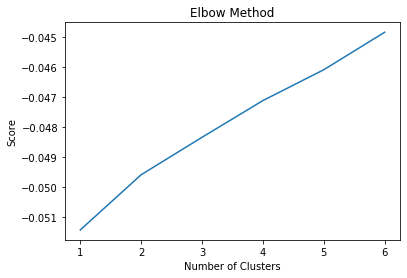

<Figure size 4.32x5.76 with 0 Axes>

In [19]:
from sklearn.cluster import KMeans
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.figure(figsize=(0.06,0.08))
plt.show()

**As we can say the line break at 2. So, NUM_CLUSTERS=2**

In [20]:
from nltk.cluster import KMeansClusterer
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]


In [37]:
from sklearn import cluster
from sklearn import metrics

for index, sentence in enumerate(list_of_sentance):    
    print(f"{assigned_clusters[index]} : {sentence} ")
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

"""
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
""" 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print (f"Silhouette_score is: {silhouette_score}")


0 : ['project', 'planning', 'source', 'code', 'management', 'ci', 'cd', 'monitoring', 'gitlab', 'complete', 'devops', 'platform', 'delivered', 'single', 'application', 'gitlab', 'enables', 'concurrent', 'devops', 'make', 'software', 'lifecycle', 'faster'] 
0 : ['reduce', 'risk', 'optimize', 'software', 'delivery', 'accelerate', 'innovation', 'cloudbees', 'industry', 'leading', 'devops', 'technology', 'platform', 'build', 'stuff', 'matter'] 
1 : ['squarespace', 'one', 'solution', 'anyone', 'looking', 'create', 'beautiful', 'website', 'domain', 'ecommerce', 'hosting', 'gallery', 'analytics', 'support', 'included'] 
1 : ['create', 'free', 'website', 'wix', 'com', 'choose', 'stunning', 'template', 'customize', 'anything', 'wix', 'website', 'builder', 'coding', 'skill', 'needed', 'create', 'today'] 
Silhouette_score is: 0.018349863588809967


#### As we can see (0 , 1 ) are our clusters and the list mentioned is our Company_Description in the form of list_of_sentance.

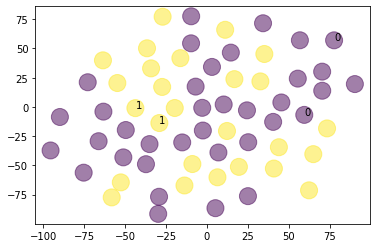

In [39]:
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(list_of_sentance)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
plt.show()

**K-Mean Cluster Plot**

### Results & Conclusion
1. The results are good.
2. Clustering is done and as we can see our system is clustering sentence 1 with 2 and 3 with 4 which is our desired result.